In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path ke ZIP file
zip_path = '/content/drive/MyDrive/Dataset /Hand_Sign.zip'
extract_path = '/content/Hand_Sign'

# Ekstrak ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ ZIP file berhasil diekstrak.")

✅ ZIP file berhasil diekstrak.


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt


In [ ]:
IMG_SIZE = 64
TRAIN_DIR = '/content/Hand_Sign/Train'

X = []
y = []

print("[*] Loading images from:", TRAIN_DIR)

for label in sorted(os.listdir(TRAIN_DIR)):
    folder = os.path.join(TRAIN_DIR, label)
    if os.path.isdir(folder):
        for img_file in os.listdir(folder):
            img_path = os.path.join(folder, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                X.append(img)
                y.append(label)

# Convert to NumPy arrays
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y_onehot, test_size=0.2, stratify=y, random_state=42)

print(f"✅ Loaded {len(X)} images from {len(set(y))} classes")


[*] Loading images from: /content/Hand_Sign/Train
✅ Loaded 27455 images from 24 classes


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y)), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,627,672 (6.21 MB)

 Trainable params: 1,627,672 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 150s 213ms/step - accuracy: 0.3045 - loss: 2.2968 - val_accuracy: 0.8993 - val_loss: 0.3957
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 147s 214ms/step - accuracy: 0.7976 - loss: 0.5693 - val_accuracy: 0.9883 - val_loss: 0.0814
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 201s 213ms/step - accuracy: 0.9009 - loss: 0.2818 - val_accuracy: 0.9993 - val_loss: 0.0230
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 202s 213ms/step - accuracy: 0.9319 - loss: 0.1900 - val_accuracy: 0.9971 - val_loss: 0.0135
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 197s 206ms/step - accuracy: 0.9502 - loss: 0.1389 - val_accuracy: 0.9995 - val_loss: 0.0112
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 146s 212ms/step - accuracy: 0.9631 - loss: 0.1048 - val_accuracy: 0.9993 - val_loss: 0.0037
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 202s 212ms/step - accuracy: 0.9672 - loss: 0.0926 - val_accuracy: 0.9998 - val_loss: 0.0043
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 143s 208ms/step - accuracy: 0.9679 -

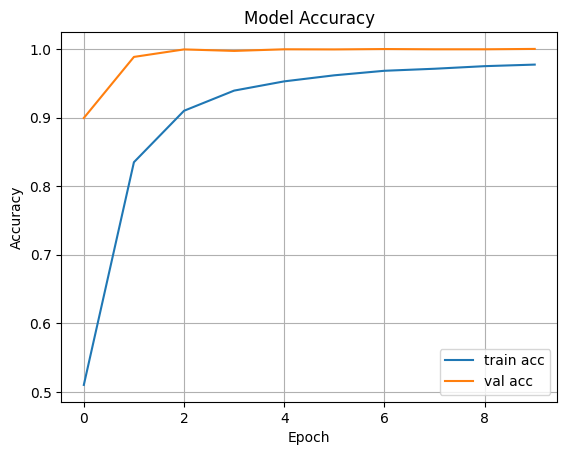

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path ke folder test (isi folder a, b, c, ... y)
TEST_DIR = "/content/Hand_Sign/Test"

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False
)



Found 7172 images belonging to 24 classes.


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"🧪 Test accuracy: {test_acc*100:.2f}%")


225/225 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9124 - loss: 0.7205
🧪 Test accuracy: 83.91%


In [ ]:
model.save("hand_sign_model.h5")
print("Model saved to hand_sign_model.h5")


Model saved to hand_sign_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


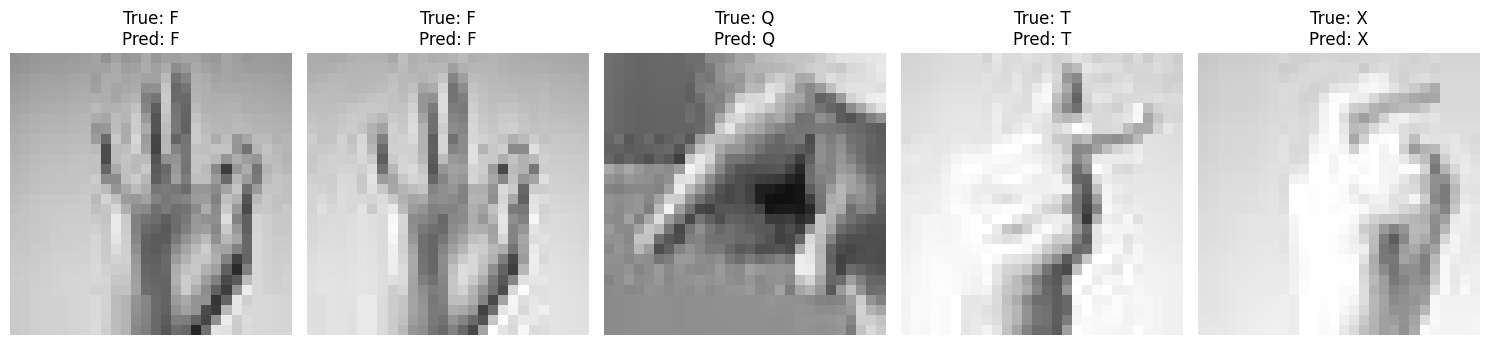

In [43]:
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load model
model = load_model("hand_sign_model.h5")

# Load label classes
test_dir = "/content/Hand_Sign/Test"
class_indices = test_generator.class_indices
class_names = list(class_indices.keys())  # ✅ urutan sama kayak waktu model dilatih
 # ['a', 'b', ..., 'y']

# Fungsi preprocess
def preprocess_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (64, 64))
    img = img / 255.0
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)
    return img

# Ambil 5 gambar random
samples = []
for _ in range(5):
    random_class = random.choice(class_names)
    class_path = os.path.join(test_dir, random_class)
    random_file = random.choice(os.listdir(class_path))
    file_path = os.path.join(class_path, random_file)
    samples.append((file_path, random_class))

# Plot gambar dan prediksi
plt.figure(figsize=(15, 6))
for i, (file_path, true_label) in enumerate(samples):
    img = preprocess_image(file_path)
    prediction = model.predict(img)
    predicted_label = class_names[np.argmax(prediction)]

    # Baca ulang untuk ditampilkan (tanpa preprocess)
    img_show = cv2.imread(file_path)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 5, i+1)
    plt.imshow(img_show)
    plt.axis('off')
    plt.title(f"True: {true_label}\nPred: {predicted_label}")

plt.tight_layout()
plt.show()


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=class_names))


              precision    recall  f1-score   support

           A       0.93      1.00      0.96       331
           B       1.00      0.93      0.96       432
           C       1.00      0.99      0.99       310
           D       0.96      1.00      0.98       245
           E       0.92      1.00      0.96       498
           F       0.97      0.98      0.97       247
           G       0.84      0.81      0.83       348
           H       0.89      0.85      0.87       436
           I       0.91      0.74      0.81       288
           K       0.89      0.68      0.77       331
           L       0.74      0.85      0.79       209
           M       0.79      0.84      0.81       394
           N       0.73      0.70      0.72       291
           O       0.89      0.83      0.86       246
           P       1.00      0.94      0.97       347
           Q       0.76      0.99      0.86       164
           R       0.50      0.43      0.46       144
           S       0.82    

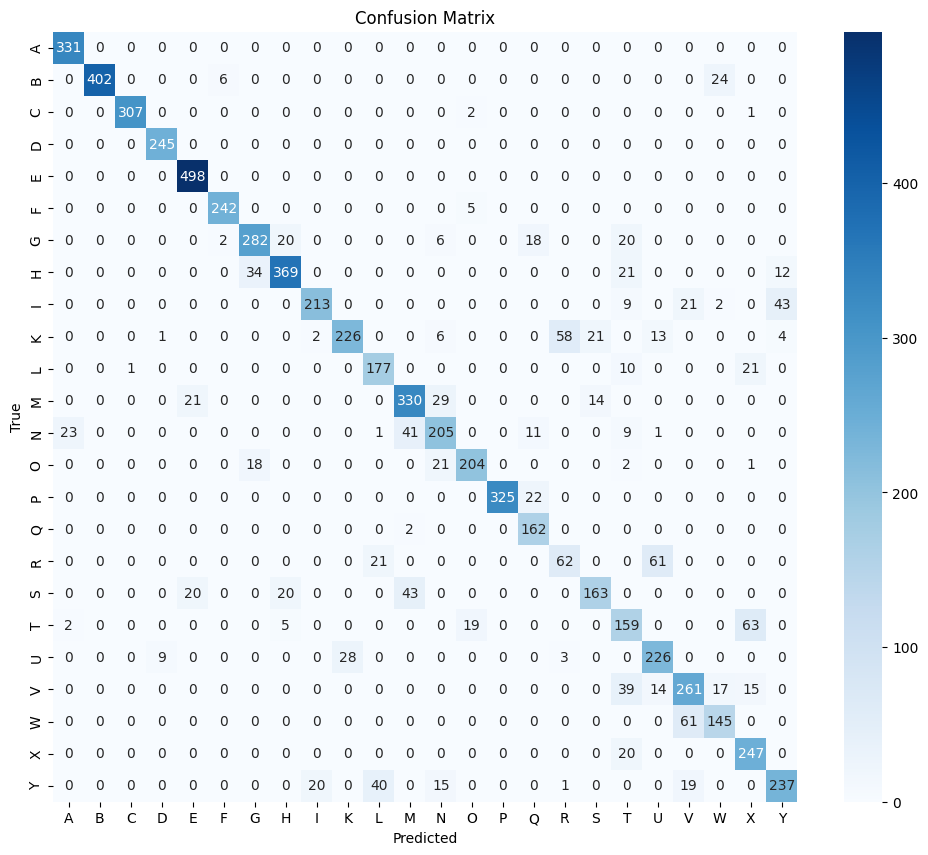

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [58]:
from sklearn.metrics import classification_report

# Tampilkan laporan klasifikasi lengkap
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))



📊 Classification Report:
              precision    recall  f1-score   support

           A     0.9298    1.0000    0.9636       331
           B     1.0000    0.9306    0.9640       432
           C     0.9968    0.9903    0.9935       310
           D     0.9608    1.0000    0.9800       245
           E     0.9239    1.0000    0.9605       498
           F     0.9680    0.9798    0.9738       247
           G     0.8443    0.8103    0.8270       348
           H     0.8913    0.8463    0.8682       436
           I     0.9064    0.7396    0.8145       288
           K     0.8898    0.6828    0.7726       331
           L     0.7406    0.8469    0.7902       209
           M     0.7933    0.8376    0.8148       394
           N     0.7270    0.7045    0.7155       291
           O     0.8870    0.8293    0.8571       246
           P     1.0000    0.9366    0.9673       347
           Q     0.7606    0.9878    0.8594       164
           R     0.5000    0.4306    0.4627       144
 